In [1]:
import numpy as np
import matplotlib.pyplot as pl

In [2]:
def Clear (xsize, ysize):
    global Image
    Image = np.zeros ((ysize, xsize))
    Image [(0, Ymax()), 0 : xsize] = 1
    Image [0 : ysize, (0, Xmax())] = 1

In [3]:
def Pixel (x, y):
    return Image [Image.shape [0] - 1 - y, x]

In [4]:
def SetPixel (x, y):
    Image [Image.shape [0] - 1 - y, x] = 1

In [5]:
def Show ():
    pl.imshow (1 - Image, cmap = 'gray')
    pl.axis ('off')

In [6]:
def Xmax ():
    return Xsize() - 1

In [7]:
def Xsize ():
    return Image.shape [1]

In [8]:
def Ymax ():
    return Ysize() - 1

In [9]:
def Ysize ():
    return Image.shape [0]

In [10]:
Width = 200
Height = 160

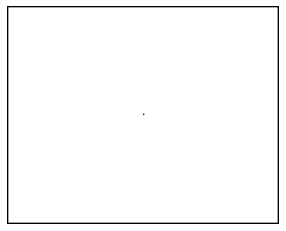

In [11]:
Clear (Width, Height)
SetPixel (Xsize() >> 1, Ysize() >> 1)
Show()

In [13]:
def Bbox (*vv):
    pp = np.concatenate (vv, axis = 1)
    xmin = round (np.min (pp [0, :]))
    xmax = round (np.max (pp [0, :]))
    ymin = round (np.min (pp [1, :]))
    ymax = round (np.max (pp [1, :]))
    return xmin, xmax, ymin, ymax

In [14]:
def Det (v, w):
    return v [0, 0] * w [1, 0] - v [1, 0] * w [0, 0]

In [15]:
def Dot (v, w):
    return v [0, 0] * w [0, 0] + v [1, 0] * w [1, 0]

In [16]:
def Vec (x, y):
    return np.array ([[x], [y]])

In [17]:
A = Vec (10, 10)
B = Vec (Xmax() - 10, 50)
C = Vec (Ymax() >> 1, Ymax() - 10)

In [18]:
def Line0 (x0, y0, x1, y1):
    m = (y1 - y0) / (x1 - x0)
    for x in range (x0, x1 + 1):
        y = round (y0 + m * x)
        SetPixel (x, y)

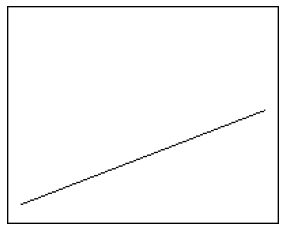

In [20]:
Clear (Width, Height)
Line0 (10, 10, Xmax() - 10, Ymax() >> 1)
Show()

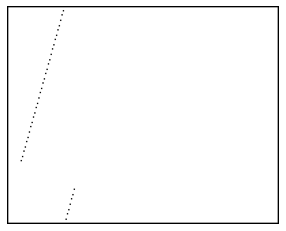

In [21]:
Clear (Width, Height)
Line0 (10, 10, Xmax() >> 2, Ymax() - 10)
Show()

In [22]:
def Line (x0, y0, x1, y1):
    dx = x1 - x0
    dy = y1 - y0
    n = max (abs (dx), abs (dy))
    mx = dx / n
    my = dy / n
    for i in range (n):
        SetPixel (round (x0 + mx * i), round (y0 + my * i))

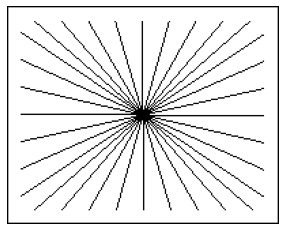

In [23]:
Clear (Width, Height)
d = 20
for x in range (d, Xsize(), d):
    Line (x, 10, Xmax() - x, Ymax() - 10)
for y in range (d, Ysize(), d):
    Line (10, y, Xmax() - 10, Ymax() - y)
Show()

https://de.wikipedia.org/wiki/Bresenham-Algorithmus

In [26]:
def LineBresenham (x0, y0, x1, y1):
    dx = x1 - x0
    dy = y1 - y0
    de = 2 * dy
    d = de - dx
    dne = d - dx
    y = y0
    SetPixel (x0, y0)
    for x in range (x0 + 1, x1 + 1):
        if d <= 0:
            d += de
        else:
            d += dne
            y += 1
        SetPixel (x, y)

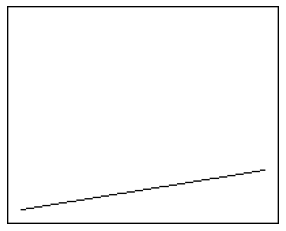

In [27]:
Clear (Width, Height)
LineBresenham (10, 10, Xmax() - 10, Ymax() >> 2)
Show()

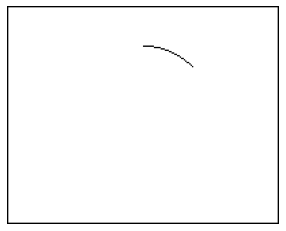

In [24]:
def Circle0 (x0, y0, r):
    x = 0
    y = r
    d = 1 - r
    SetPixel (x0 + x, y0 + y)
    while y > x:
        if d < 0:
            d = d + 2 * x + 3
        else:
            d = d + 2 * (x - y) + 5
            y = y - 1
        x = x + 1
        SetPixel (x0 + x, y0 + y)

Clear (Width, Height)
Circle0 (Xsize() >> 1, Ysize() >> 1, Xsize() >> 2)
Show()

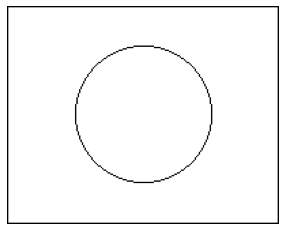

In [25]:
def Circle (x0, y0, r):
    x = 0
    y = r
    d = 1 - r
    SetPixel (x0 + x, y0 + y)
    SetPixel (x0 - x, y0 + y)
    SetPixel (x0 + x, y0 - y)
    SetPixel (x0 - x, y0 - y)
    SetPixel (x0 + y, y0 + x)
    SetPixel (x0 - y, y0 + x)
    SetPixel (x0 + y, y0 - x)
    SetPixel (x0 - y, y0 - x)
    while y > x:
        if d < 0:
            d = d + 2 * x + 3
        else:
            d = d + 2 * (x - y) + 5
            y = y - 1
        x = x + 1
        SetPixel (x0 + x, y0 + y)
        SetPixel (x0 - x, y0 + y)
        SetPixel (x0 + x, y0 - y)
        SetPixel (x0 - x, y0 - y)
        SetPixel (x0 + y, y0 + x)
        SetPixel (x0 - y, y0 + x)
        SetPixel (x0 + y, y0 - x)
        SetPixel (x0 - y, y0 - x)

Clear (Width, Height)
Circle (Xsize() >> 1, Ysize() >> 1, Xsize() >> 2)
Show()

In [26]:
def LineP (a, b):
    Line (round (a [0, 0]), round (a [1, 0]), round (b [0, 0]), round (b [1, 0]))

In [27]:
def FloodFill (x, y):
    if Pixel (x, y) == 0:
        SetPixel (x, y)
        FloodFill (x - 1, y)
        FloodFill (x, y - 1)
        FloodFill (x + 1, y)
        FloodFill (x, y + 1)

In [28]:
def FloodFill (x, y):
    s = []
    s.append ((x, y))
    while len (s) > 0:
        x, y = s.pop()
        if Pixel (x, y) == 0:
            SetPixel (x, y)
            s.append ((x - 1, y))
            s.append ((x, y - 1))
            s.append ((x + 1, y))
            s.append ((x, y + 1))

In [29]:
def Fill1 (a, b, c):
    LineP (a, b)
    LineP (b, c)
    LineP (c, a)
    s = (a + b + c) / 3
    FloodFill (round (s [0, 0]), round (s [1, 0]))

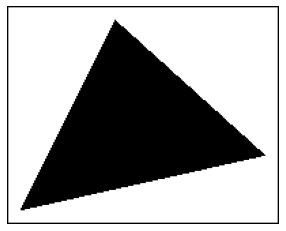

In [30]:
Clear (Width, Height)
Fill1 (A, B, C)
Show()

https://commons.wikimedia.org/wiki/File:TriangleBarycentricCoordinates.svg
https://de.wikipedia.org/wiki/Baryzentrische_Koordinaten#In_einer_Ebene_(n=3,_Dreieck)

In [31]:
def Fill2 (a, b, c):
    xmin, xmax, ymin, ymax = Bbox (a, b, c)
    u = b - a
    v = c - a
    d = Det (u, v)
    for x in range (xmin, xmax + 1):
        for y in range (ymin, ymax + 1):
            w = Vec (x, y) - a
            s = Det (w, v) / d
            if s >= 0:
                t = Det (u, w) / d
                if t >= 0:
                    if s + t <= 1:
                        SetPixel (x, y)

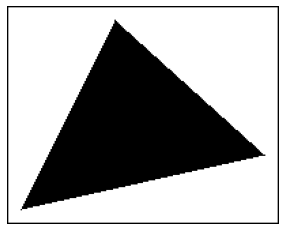

In [32]:
Clear (Xsize(), Ysize())
Fill2 (A, B, C)
Show()

In [33]:
def Fill3 (a, b, c):
    xmin, xmax, ymin, ymax = Bbox (a, b, c)
    rot = np.array ([[0, -1], [1, 0]])
    u = b - a; un = rot @ u
    v = c - b; vn = rot @ v
    w = a - c; wn = rot @ w
    for x in range (xmin, xmax + 1):
        for y in range (ymin, ymax + 1):
            p = Vec (x, y)
            if Dot (p - a, un) >= 0:
                if Dot (p - b, vn) >= 0:
                    if Dot (p - c, wn) >= 0:
                        SetPixel (x, y)

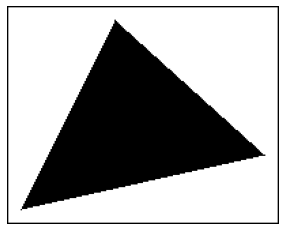

In [34]:
Clear (Xsize(), Ysize())
Fill3 (A, B, C)
Show()

In [35]:
def Fill3 (a, b, c):
    if b [1] > a [1] and b [1] > c [1]:
        Fill3 (b, a, c)
        return
    if c [1] > a [1] and c [1] > b [1]:
        Fill3 (c, a, b)
        return
    if c [1] > b [1]:
        Fill3 (a, c, b)
        return

In [36]:
m = Xsize()
n = Ysize()

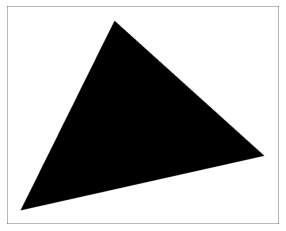

In [37]:
factor = 5
Clear (factor * m, factor * n)
Fill1 (factor * A, factor * B, factor * C)
Show()